In [1]:
import numpy as np 
import pandas as pd

import os

dataset_directory = r"dataset"

for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\test\Chanos Chanos\IMG_20190930_070412.tif
dataset\test\Chanos Chanos\IMG_20190930_070438.tif
dataset\test\Chanos Chanos\IMG_20190930_070641.tif
dataset\test\Chanos Chanos\IMG_20190930_070924.tif
dataset\test\Chanos Chanos\IMG_20190930_071142.tif
dataset\test\Chanos Chanos\IMG_20190930_071309.tif
dataset\test\Chanos Chanos\IMG_20190930_071342.tif
dataset\test\Chanos Chanos\IMG_20191001_062602.tif
dataset\test\Chanos Chanos\IMG_20191001_062719.tif
dataset\test\Chanos Chanos\IMG_20191001_062732.tif
dataset\test\Chanos Chanos\IMG_20191001_062929.tif
dataset\test\Chanos Chanos\IMG_20191001_063255.tif
dataset\test\Chanos Chanos\IMG_20191002_062812.tif
dataset\test\Chanos Chanos\IMG_20191002_062826.tif
dataset\test\Chanos Chanos\IMG_20191002_063024.tif
dataset\test\Chanos Chanos\IMG_20191002_063050.tif
dataset\test\Chanos Chanos\IMG_20191002_063151.tif
dataset\test\Chanos Chanos\IMG_20191002_063245.tif
dataset\test\Chanos Chanos\IMG_20191002_063507.tif
dataset\test\Chanos Chanos\IMG_

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
# Data augmentation untuk dataset pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisasi nilai piksel
    shear_range=0.2,       # Transformasi geser
    zoom_range=0.2,        # Transformasi zoom
    horizontal_flip=True   # Flip horizontal
)

# Hanya rescaling untuk validasi dan pengujian
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Path direktori dataset
train_dir = r'dataset/train'
test_dir = r'dataset/test'
val_dir = r'dataset/val'

# Dataset pelatihan
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Ukuran gambar
    batch_size=32,          # Ukuran batch
    class_mode='categorical'  # Mode kelas
)

# Dataset pengujian
test_data = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Dataset validasi
val_data = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 2270 images belonging to 8 classes.
Found 489 images belonging to 8 classes.
Found 489 images belonging to 8 classes.


In [4]:
# Membuat model Sequential
model = Sequential()

# **Input Layer dan Lapisan Konvolusi Pertama**
# Layer konvolusi dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU
# Input: gambar dengan ukuran 128x128 piksel dan 3 saluran warna (RGB)
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))

# Layer pooling pertama untuk mengurangi dimensi data secara spasial
model.add(MaxPooling2D(pool_size=(2, 2)))

# **Lapisan Konvolusi Kedua**
# Layer konvolusi dengan 64 filter, ukuran kernel 3x3, fungsi aktivasi ReLU
model.add(Conv2D(64, (3, 3), activation='relu'))

# Layer pooling kedua untuk mengurangi dimensi data lebih lanjut
model.add(MaxPooling2D(pool_size=(2, 2)))

# **Lapisan Konvolusi Ketiga**
# Layer konvolusi dengan 128 filter, ukuran kernel 3x3, fungsi aktivasi ReLU
model.add(Conv2D(128, (3, 3), activation='relu'))

# Layer pooling ketiga untuk mengurangi dimensi data lebih lanjut
model.add(MaxPooling2D(pool_size=(2, 2)))

# **Flatten Layer**
# Mengubah output dari bentuk multidimensi (2D matriks) menjadi satu dimensi (vektor)
model.add(Flatten())

# **Fully Connected Layers**
# Lapisan Dense pertama dengan 1024 neuron, fungsi aktivasi ReLU
# Digunakan untuk mempelajari hubungan global dari fitur yang telah diekstraksi
model.add(Dense(1024, activation='relu'))

# Dropout 40% untuk mencegah overfitting
model.add(Dropout(0.4))

# Lapisan Dense kedua dengan 128 neuron, fungsi aktivasi ReLU
model.add(Dense(128, activation='relu'))

# Dropout 20% untuk mencegah overfitting
model.add(Dropout(0.2))

# Lapisan Dense ketiga dengan 64 neuron, fungsi aktivasi ReLU
model.add(Dense(64, activation='relu'))

# Dropout 20% untuk mencegah overfitting
model.add(Dropout(0.2))

# **Output Layer**
# Lapisan Dense dengan 8 neuron (untuk 8 kelas), fungsi aktivasi Softmax
# Menghasilkan probabilitas untuk setiap kelas
model.add(Dense(8, activation='softmax'))

# **Compile Model**
# Menggunakan loss function categorical_crossentropy (karena klasifikasi multi-kelas)
# Optimizer: Adam dengan learning rate 0.001
# Metrics: Akurasi untuk mengevaluasi performa model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_data,
                    epochs=100,
                    validation_data=val_data)

Epoch 1/100
71/71 [==============================] - 72s 999ms/step - loss: 2.0424 - accuracy: 0.1731 - val_loss: 1.9617 - val_accuracy: 0.2393
Epoch 2/100
71/71 [==============================] - 46s 651ms/step - loss: 1.8971 - accuracy: 0.2454 - val_loss: 1.6426 - val_accuracy: 0.3824
Epoch 3/100
71/71 [==============================] - 46s 651ms/step - loss: 1.5316 - accuracy: 0.4198 - val_loss: 1.4169 - val_accuracy: 0.4417
Epoch 4/100
71/71 [==============================] - 46s 644ms/step - loss: 1.2358 - accuracy: 0.5308 - val_loss: 0.8151 - val_accuracy: 0.6789
Epoch 5/100
71/71 [==============================] - 46s 645ms/step - loss: 1.0274 - accuracy: 0.6123 - val_loss: 0.7359 - val_accuracy: 0.7014
Epoch 6/100
71/71 [==============================] - 47s 662ms/step - loss: 0.8675 - accuracy: 0.6696 - val_loss: 0.5619 - val_accuracy: 0.7914
Epoch 7/100
71/71 [==============================] - 47s 662ms/step - loss: 0.8185 - accuracy: 0.6771 - val_loss: 0.9477 - val_accuracy:

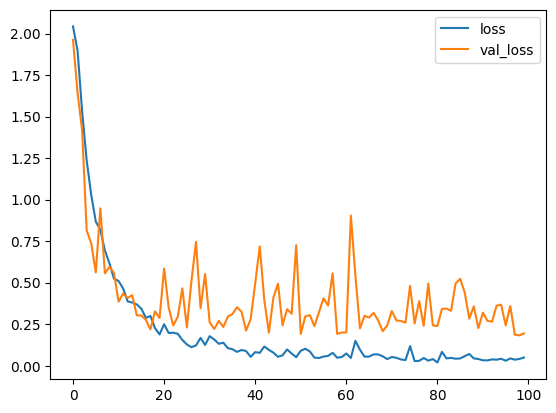

In [6]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

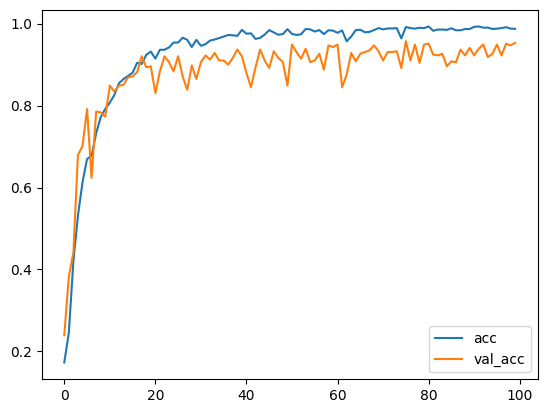

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
model_name = 'FishModelClassifier.h5'
model.save(model_name, save_format='h5')
model.save_weights('model_weights.h5')

c:\Users\Arya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
results = model.evaluate(test_data, verbose=0)


print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.17638
Test Accuracy: 95.71%


Model berhasil dimuat.
Found 489 images belonging to 8 classes.
16/16 [==============================] - 7s 430ms/step

Classification Report:

                             precision    recall  f1-score   support

              Chanos Chanos       0.95      1.00      0.97        75
Eleutheronema Tetradactylum       0.97      0.92      0.94        36
     Johnius Trachycephalus       0.97      1.00      0.99        36
            Nibea Albiflora       0.76      0.89      0.82        38
    Oreochromis Mossambicus       1.00      1.00      1.00        50
      Oreochromis Niloticus       0.97      0.99      0.98        85
       Rastrelliger Faughni       1.00      0.87      0.93        82
        Upeneus Moluccensis       0.99      0.98      0.98        87

                   accuracy                           0.96       489
                  macro avg       0.95      0.96      0.95       489
               weighted avg       0.96      0.96      0.96       489



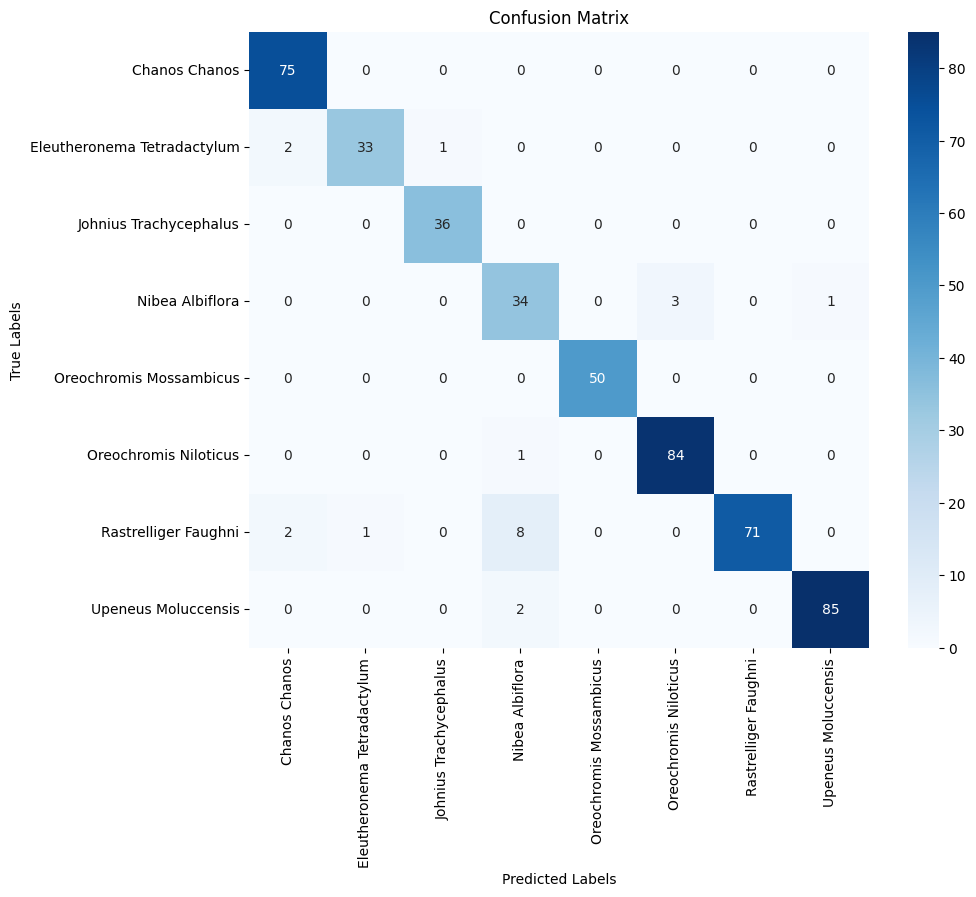

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Memuat model dari file .h5
model = load_model('FishModelClassifier.h5')
print("Model berhasil dimuat.")

# 2. Menyiapkan dataset pengujian
# Path direktori dataset pengujian
test_dir = r'dataset/test'

# Data augmentation untuk dataset pengujian (hanya rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator data pengujian
test_data = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Ukuran gambar
    batch_size=32,          # Ukuran batch
    class_mode='categorical',  # Mode kelas
    shuffle=False           # Pastikan shuffle=False untuk evaluasi
)

# 3. Evaluasi model
# Mendapatkan label asli dari dataset pengujian
y_true = test_data.classes

# Mendapatkan label prediksi dari model
predictions = model.predict(test_data, verbose=1)
y_pred = np.argmax(predictions, axis=1)

# Daftar label kelas
class_labels = list(test_data.class_indices.keys())

# Menghitung dan menampilkan classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

# Menghitung dan menampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
